In [1]:
import numpy as np
import pandas as pd
import warnings
import os
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Dead', 'Dead'], yticklabels=['Dead', 'Dead'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [2]:
data = pd.read_csv('character-deaths.csv')
data.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
8,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,1,0,0,0,1,0,0


## Load Data

In [3]:
data = pd.read_csv('character-deaths.csv')
data.head(10)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
5,Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
7,Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
8,Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0
9,Aethan,Night's Watch,NaN,NaN,NaN,0.0,1,0,0,0,1,0,0


## Data Preprocessing

### Replace missing value with 0 or median

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [5]:
data['Book Intro Chapter'] = data['Book Intro Chapter'].fillna(data['Book Intro Chapter'].median())
data = data.fillna(0)

### Choose 'Death Year' and turn non-NaN value to 1

In [ ]:
data['Death Year'] = data['Death Year'].apply(lambda x: 1 if x!=0 else 0)
data = data.drop(['Book of Death','Death Chapter'], axis=1)

### Turn 'Allegiances' to dummy features

In [6]:
Allegiances = data['Allegiances']
alle_dummy = pd.get_dummies(Allegiances)

In [7]:
alle_dummy

,Arryn,Baratheon,Greyjoy,House Arryn,House Baratheon,House Greyjoy,House Lannister,House Martell,House Stark,House Targaryen,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
data = pd.concat([data,alle_dummy], axis=1).drop(['Allegiances'], axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Death Year          917 non-null    int64  
 2   Book Intro Chapter  917 non-null    float64
 3   Gender              917 non-null    int64  
 4   Nobility            917 non-null    int64  
 5   GoT                 917 non-null    int64  
 6   CoK                 917 non-null    int64  
 7   SoS                 917 non-null    int64  
 8   FfC                 917 non-null    int64  
 9   DwD                 917 non-null    int64  
 10  Arryn               917 non-null    uint8  
 11  Baratheon           917 non-null    uint8  
 12  Greyjoy             917 non-null    uint8  
 13  House Arryn         917 non-null    uint8  
 14  House Baratheon     917 non-null    uint8  
 15  House Greyjoy       917 non-null    uint8  
 16  House La

### 2-4亂數拆成訓練集(75%)與測試集(25%) 

In [10]:
data_X = data.drop(['Name','Death Year'], axis=1)
data_y = data['Death Year']

In [11]:
data_X

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
0,56.0,1,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,49.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27.0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,21.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
913,47.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
914,25.0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
915,73.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
data_y

0      0
1      1
2      0
3      1
4      0
      ..
912    0
913    1
914    1
915    1
916    1
Name: Death Year, Length: 917, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25)

In [16]:
X_train

,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Arryn,Baratheon,...,House Tyrell,Lannister,Martell,Night's Watch,None,Stark,Targaryen,Tully,Tyrell,Wildling
894,34.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
90,7.0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
578,27.0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
555,0.0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
217,1.0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,7.0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
667,64.0,1,0,0,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
556,33.0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
291,52.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Use scikit-learn DecisionTreeClassifier to perdict

In [17]:
clf = DecisionTreeClassifier(max_depth =5)
clf = clf.fit(X_train, y_train)

## Check train set performance

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       445
           1       0.68      0.48      0.56       242

    accuracy                           0.74       687
   macro avg       0.72      0.68      0.69       687
weighted avg       0.73      0.74      0.72       687



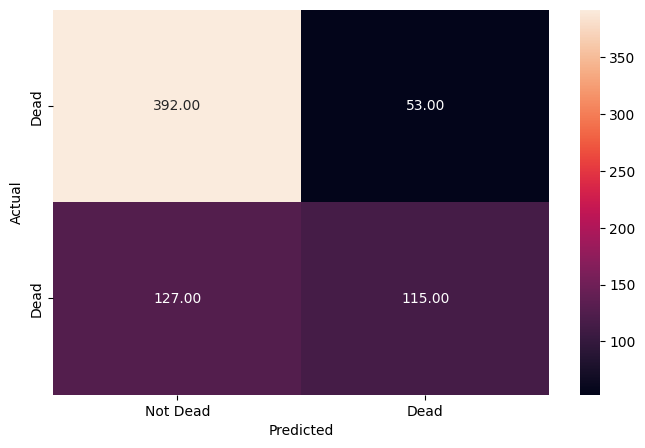

In [18]:
y_pred_train = clf.predict(X_train)
metrics_score(y_train, y_pred_train)

## Check test set performance

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       167
           1       0.39      0.21      0.27        63

    accuracy                           0.70       230
   macro avg       0.57      0.54      0.54       230
weighted avg       0.65      0.70      0.66       230



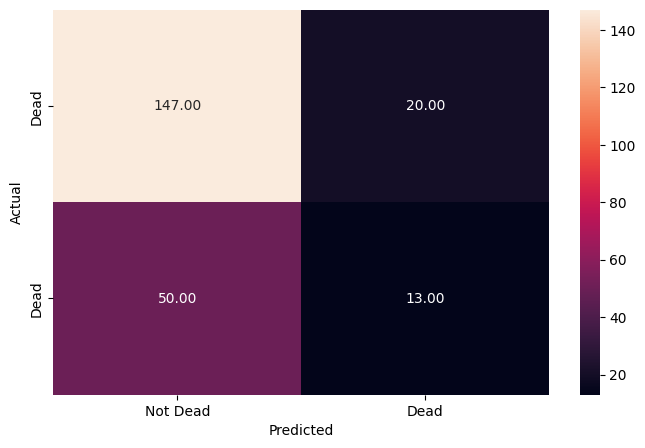

In [19]:
y_pred_test = clf.predict(X_test)
metrics_score(y_test, y_pred_test)

## Produce the Decision Tree Graph

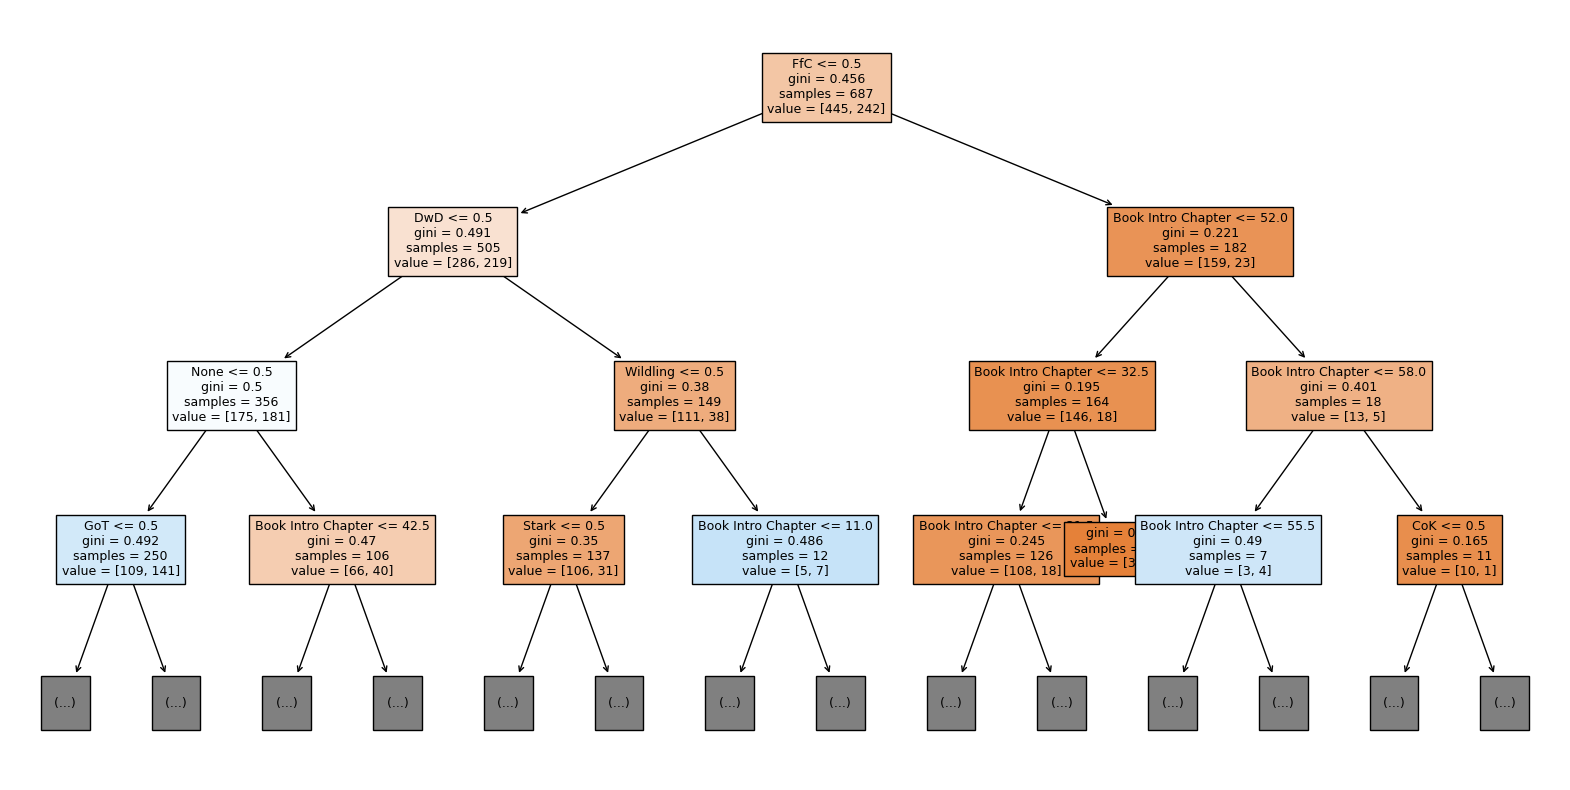

In [20]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    clf,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

## Check the Importance of features in the tree building

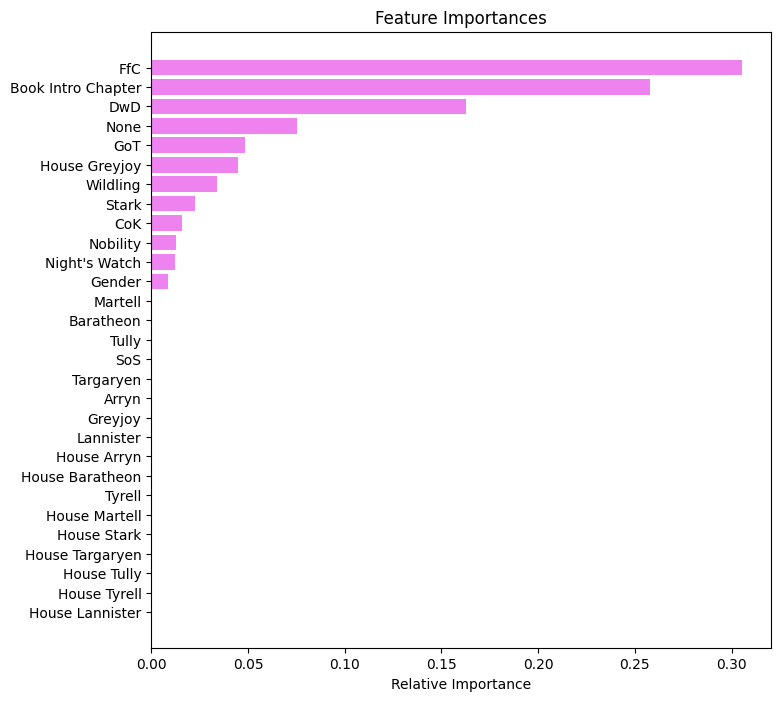

In [21]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Use grid search for best parameters

In [22]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.82      0.61      0.70       445
           1       0.51      0.75      0.61       242

    accuracy                           0.66       687
   macro avg       0.66      0.68      0.65       687
weighted avg       0.71      0.66      0.66       687



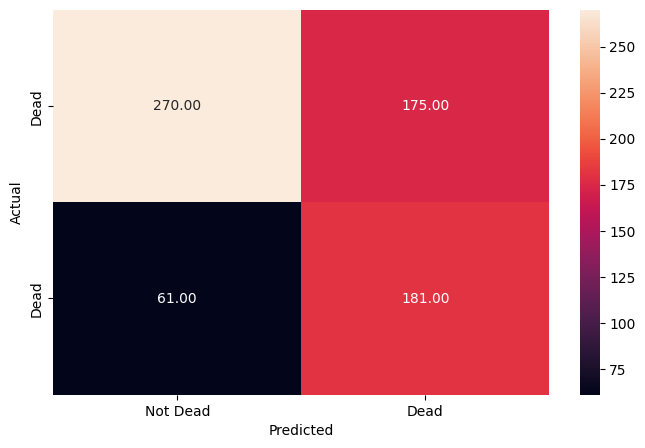

In [23]:
y_pred_train = estimator.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       167
           1       0.46      0.73      0.56        63

    accuracy                           0.69       230
   macro avg       0.66      0.70      0.66       230
weighted avg       0.76      0.69      0.70       230



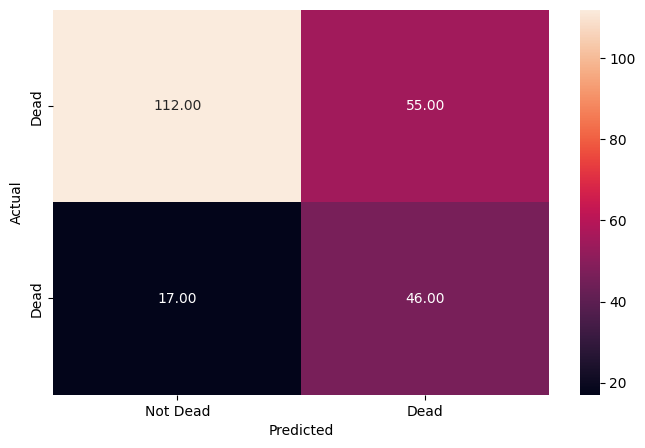

In [24]:
y_pred_test = estimator.predict(X_test)
metrics_score(y_test, y_pred_test)

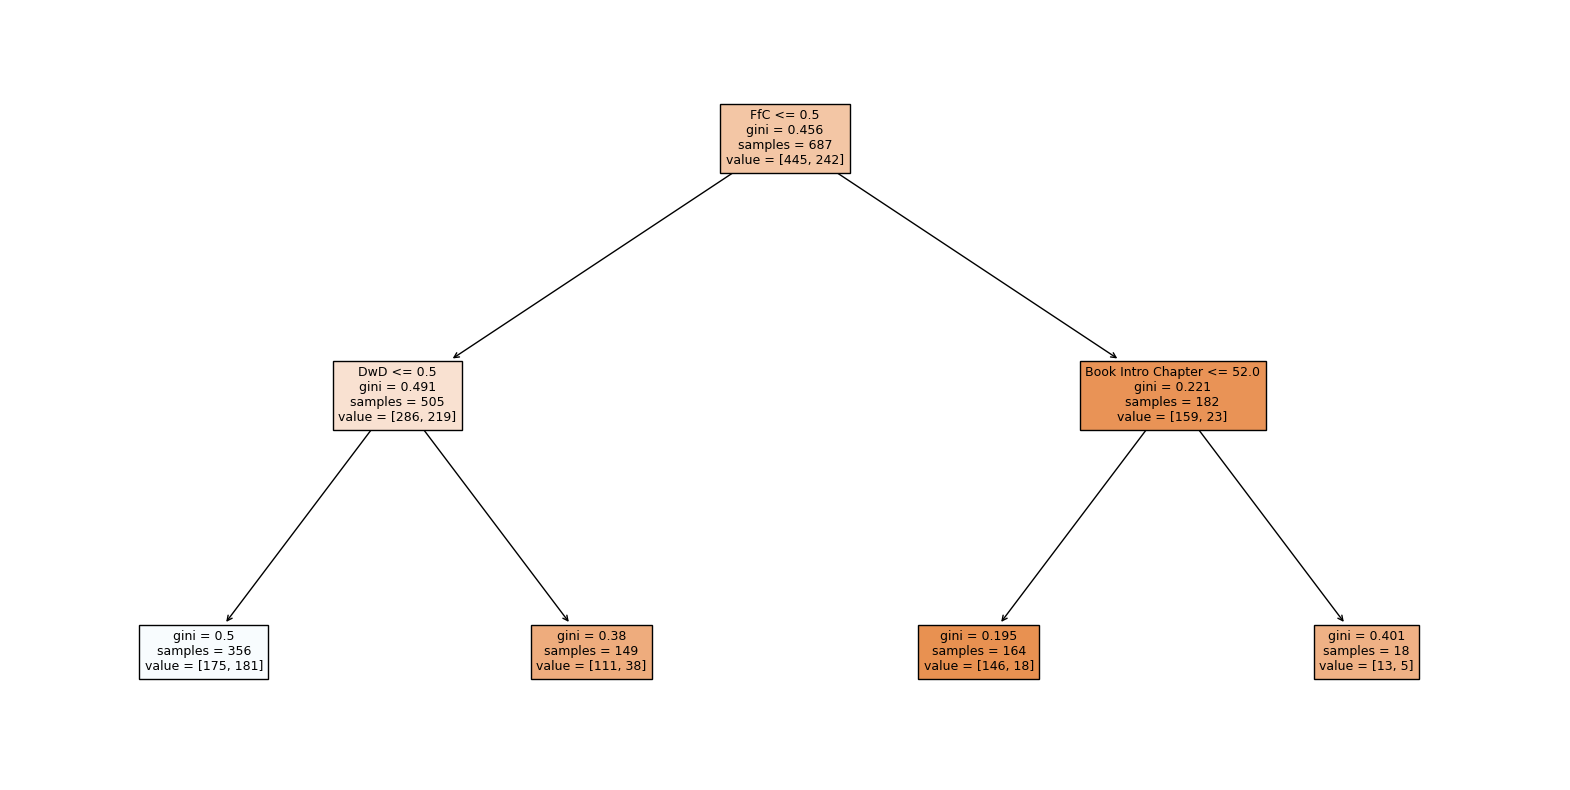

In [25]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)

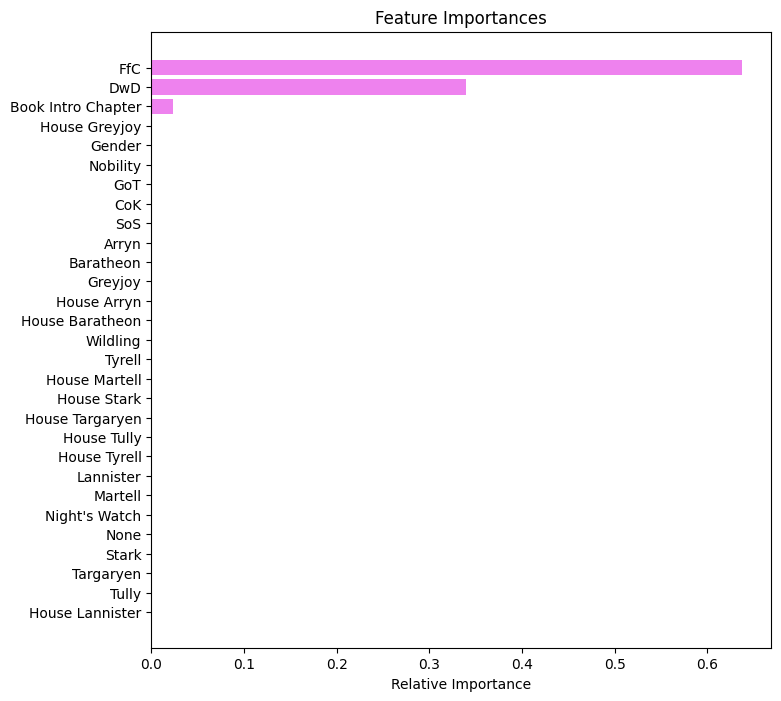

In [26]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Submit to Kaggle

In [27]:
final_test = pd.read_csv('test.csv')
test_character = final_test.Character
final_test = final_test.drop(['Name','Character'],axis=1)
final_test = final_test.fillna(0)
final_test

,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Wildling,41.0,1,0,0,0,1,0,0
1,None,49.0,1,1,0,0,1,0,0
2,Lannister,8.0,0,1,0,1,0,0,0
3,Wildling,0.0,0,0,0,0,0,0,1
4,Lannister,26.0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
225,House Stark,4.0,1,1,0,1,0,0,0
226,Tully,71.0,1,1,1,1,0,0,0
227,Targaryen,42.0,1,0,0,0,1,0,1
228,None,59.0,0,1,1,1,1,0,1


In [28]:
Allegiances_test = final_test['Allegiances']
alle_dummy = pd.get_dummies(Allegiances_test)
final_test = pd.concat([final_test,alle_dummy], axis=1).drop(['Allegiances'], axis=1)

In [29]:
final_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [30]:
prediction = estimator.predict(final_test)

In [31]:
output = pd.DataFrame({'Character': test_character, 'Death': prediction})
output.to_csv('HW1_submmit-2.csv', index=False)
print("Successfully saved!")

Successfully saved!
